## Measuring Performance ##
In this notebook, we will analyse the behaviour of the parallel crawler for different number of threads.

In [44]:
# necessary imports
import subprocess
import matplotlib.pyplot as plt
import time

In [45]:
num_threads = 10      # Threads from 1 to num_threads
max_size = 20000    # Until the SetList gets to max_size

link = "https://en.wikipedia.org/wiki/Main_Page"

In [46]:
time_insertion_sl = dict() # dictionary {num_inserted: {num_threads : time (microseconds)} }
time_insertion_bst = dict()

subprocess.run(["make", "clean"])
subprocess.run(["make"])

for sets in ["FineBST", "SetList"]:

    time_insertion = time_insertion_sl if sets == "SetList" else time_insertion_bst

    for i in range(1, num_threads + 1):
        time_insertion[i] = dict()

        output = subprocess.run(["./main", link, str(i), str(max_size), sets ,"-s"], capture_output=True)
        
        for inser_str in output.stdout.decode("utf-8").split('\n'):

            if inser_str == '': continue

            if len(inser_str.split(' ')) == 2:
                curr_ins, time_i = inser_str.split(' ')
                if int(curr_ins) not in time_insertion[i]:
                    time_insertion[i][int(curr_ins)] = int(time_i)
            else :
                print(inser_str)
                raise AssertionError

subprocess.run(["make", "clean"]);


KeyboardInterrupt: 

In [36]:
bounds = [348] # tiny examples for now, let's do big ones later and insert the plots
no_threads = 10
overall_time_bst = dict()
overall_time_sl = dict()

for sets in ["FineBST", "SetList"]:
    overall_time = overall_time_bst if sets == "FineBST" else overall_time_sl
    for i in range(1, no_threads + 1):
        overall_time[i] = dict()
        for x in bounds:
            subprocess.run(["make", "clean"])
            subprocess.run(["make"])
            start = time.time()
            subprocess.run(["./main", link, str(i), str(x), sets])
            end = time.time()
            overall_time[i][x] = end - start
            subprocess.run(["make", "clean"])

KeyboardInterrupt: 

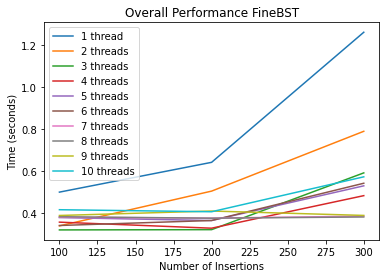

In [26]:
plt.title("Overall Performance FineBST")
plt.xlabel("Number of Insertions")
plt.ylabel("Time (seconds)")

for (thread_no, thread_no_info) in overall_time_bst.items():
    X = list(overall_time_bst[thread_no].keys())
    Y = [overall_time_bst[thread_no][x] for x in X]

    if thread_no == 1: 
        plt.plot(X,Y, label = f"{thread_no} thread")
    else:
        plt.plot(X,Y, label = f"{thread_no} threads")
    
plt.legend()
plt.show()

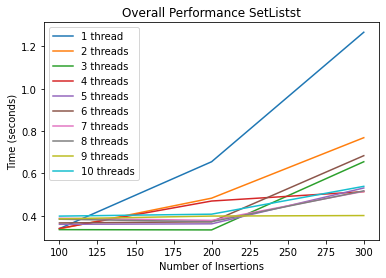

In [27]:
plt.title("Overall Performance SetList")
plt.xlabel("Number of Insertions")
plt.ylabel("Time (seconds)")

for (thread_no, thread_no_info) in overall_time_sl.items():
    X = list(overall_time_sl[thread_no].keys())
    Y = [overall_time_sl[thread_no][x] for x in X]

    if thread_no == 1: 
        plt.plot(X,Y, label = f"{thread_no} thread")
    else:
        plt.plot(X,Y, label = f"{thread_no} threads")
    
plt.legend()
plt.show()

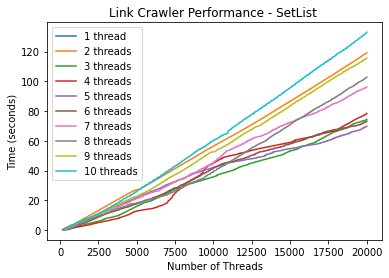

In [32]:

plt.title("Link Crawler Performance - SetList ")
plt.xlabel("Number of Threads")
plt.ylabel("Time (seconds)")

for (thread_no, thread_no_info) in time_insertion_sl.items():

    X = list(time_insertion_sl[thread_no].keys())
    Y = []

    time_overall = 0
    for i in range(len(X)):
        time_overall += time_insertion_sl[thread_no][X[i]]
        Y.append(time_overall*1e-6)
    if thread_no == 1: 
        plt.plot(X,Y, label = f"{thread_no} thread")
    else:
        plt.plot(X,Y, label = f"{thread_no} threads")
    
plt.legend()
plt.show()

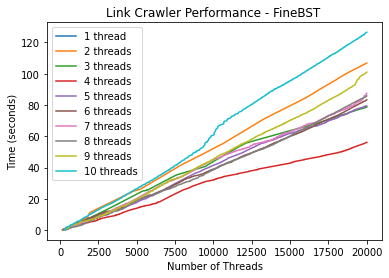

In [29]:
plt.title("Link Crawler Performance - FineBST ")
plt.xlabel("Number of Threads")
plt.ylabel("Time (seconds)")

for (thread_no, thread_no_info) in time_insertion_bst.items():

    X = list(time_insertion_bst[thread_no].keys())
    Y = []

    time_overall = 0
    for i in range(len(X)):
        time_overall += time_insertion_bst[thread_no][X[i]]
        Y.append(time_overall*1e-6)
    if thread_no == 1: 
        plt.plot(X,Y, label = f"{thread_no} thread")
    else:
        plt.plot(X,Y, label = f"{thread_no} threads")
    
plt.legend()
plt.show()

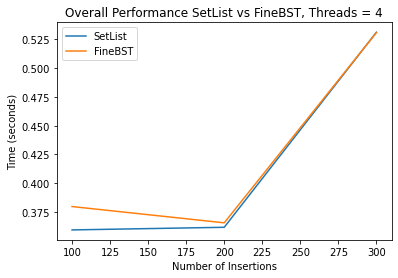

In [31]:
plt.title("Overall Performance SetList vs FineBST, Threads = 4")
plt.xlabel("Number of Insertions")
plt.ylabel("Time (seconds)")

thread_no = 5
X = list(overall_time_sl[thread_no].keys())
Y_SL =  [overall_time_sl[thread_no][x] for x in X]
Y_BST = [overall_time_bst[thread_no][x] for x in X]

plt.plot(X, Y_SL, label = "SetList")
plt.plot(X, Y_BST, label = "FineBST")

    
plt.legend()
plt.show()